Bank Marketing Analysis

**Table of contents**<a id='toc0_'></a>    
- [Datasets Introduction](#toc1_)    
- [Exploratory Data Analysis(EDA)](#toc2_)    
  - [Data Understanding & Data Cleaning](#toc2_1_)    
    - [Dealing with the "unknown" Data](#toc2_1_1_)    
    - [Checking for Duplicate Values](#toc2_1_2_)    
    - [Statistical Summary of Numerical Features](#toc2_1_3_)    
  - [Visualization of Variable Data](#toc2_2_)    
    - [Variable : Age](#toc2_2_1_)    
      - [Subscription and Contact Rate by Age ](#toc2_2_1_1_)    
    - [Variable : Job](#toc2_2_2_)    
    - [Variable : Marital](#toc2_2_3_)    
    - [Variable : Education](#toc2_2_4_)    
    - [Variables : Housing, Personal Loan](#toc2_2_5_)    
- [Creating Models (ML)](#toc3_)    
  - [Creating and Transforming Data](#toc3_1_)    
    - [Correlation between Variables](#toc3_1_1_)    
  - [Compare Classification Algorithms](#toc3_2_)    
    - [Train test split](#toc3_2_1_)    
    - [Test GBC Model on the Test Set](#toc3_2_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Datasets Introduction](#toc0_)
This dataset consists of direct marketing campaigns by a Portuguese banking institution using phone calls. The campaigns aimed to sell subscriptions to a bank term deposit.We use the newest version datasets to conduct our analysis.(1) bank-additional-full.csv with all examples (41188) and 20 inputs. (2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

Data Collected Duration:   From May 2008 to November 2010

The dataset contains the following columns, each of these stands for a current customer whom the bank contacted through phone calls:
* age 
* job : type of job
* marital : marital status
* education
* default: has credit in default?
* housing: has housing loan?
* loan: has personal loan? 
* contact: contact communication type
* month: last contact month of year 
* day_of_week: last contact day of the week
* duration: last contact duration, in seconds. 
* campaign: number of contacts performed during this campaign and for this client 
* pdays: number of days that passed by after the client was last contacted from a previous campaign
* previous: number of contacts performed before this campaign and for this client
* poutcome: outcome of the previous marketing campaign
* emp.var.rate: employment variation rate - quarterly indicator
* cons.price.idx: consumer price index - monthly indicator     
* cons.conf.idx: consumer confidence index - monthly indicator   
* euribor3m: euribor 3 month rate - daily indicator
* nr.employed: number of employees - quarterly indicator
* y - has the client subscribed a term deposit?


Citations:

Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

@misc{misc_bank_marketing_222,
  author       = {Moro,S., Rita,P., and Cortez,P.},
  title        = {{Bank Marketing}},
  year         = {2012},
  howpublished = {UCI Machine Learning Repository},
  note         = {{DOI}: https://doi.org/10.24432/C5K306}
}

# <a id='toc2_'></a>[Exploratory Data Analysis(EDA)](#toc0_)
## <a id='toc2_1_'></a>[Data Understanding & Data Cleaning](#toc0_)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

df = pd.read_csv(r'C:\Users\nmqsc\OneDrive\桌面\project\dataset\bank+marketing\bank-additional\bank-additional\bank-additional-full.csv',sep = ';')

pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
df.shape

(41188, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# checking for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

datatypes : numeric, cetegorical.

There are 41,188 observations (with no Null) and 21 columns.However, according to the reference of the datasets there are several missing values in categorical attributes, all coded with the "unknown" label. Dealing with it through out deletion and imputation. 

### <a id='toc2_1_1_'></a>[Dealing with the "unknown" Data](#toc0_)
The number of unknown labels in the job, marital, education, default, housing and loan columns are 330,80,1731,8597, 990 and 990.

(1) The job and education are critical features, so we are only replacing 'unknown' values instead of dropping them.

(2) Maritial status have 80 unknown value which is not making sense as maritial status is always label as single, married or divorced. We will remove the unknown label of maritial status from our dataset.

(3) The unknown labels in other features remain constant.

In [5]:
# counting the number of unknown in each columns 
con = df['job'] == 'unknown'
con1 = df['marital'] == 'unknown'
con2 = df['education'] == 'unknown'
con3 = df['default'] == 'unknown'
con4 = df['housing'] == 'unknown'
con5 = df['loan'] == 'unknown'

print('job:',len(df.loc[con]))
print('marital:',len(df.loc[con1]))
print('education:',len(df.loc[con2]))
print('default:',len(df.loc[con3]))
print('housing:',len(df.loc[con4]))
print('loan:',len(df.loc[con5]))

job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990


In [6]:
df = df.drop(df[df['marital'] == 'unknown'].index, axis = 0, inplace = False)
# print(df2.marital.unique())

In [7]:
df[['job','education']] = df[['job','education']].replace(['unknown'],'other')

In [8]:
# Checking unknown values' proportion in housing feature.
df['housing'].value_counts()

yes        21541
no         18578
unknown      989
Name: housing, dtype: int64

In [9]:
df['loan'].value_counts()

no         33883
yes         6236
unknown      989
Name: loan, dtype: int64

### <a id='toc2_1_2_'></a>[Checking for Duplicate Values](#toc0_)
To check if there is any duplicate value in the dataset, if so, then drop it.

In [10]:
df.duplicated().sum()

12

In [11]:
# dropping the duplicate rows 
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### <a id='toc2_1_3_'></a>[Statistical Summary of Numerical Features](#toc0_)

In [12]:
df.describe().round(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41108.00,41108.00,41108.00,41108.00,41108.00,41108.00,41108.00,41108.00,41108.00,41108.00
mean,40.02,258.18,2.57,962.52,0.17,0.08,93.58,-40.50,3.62,5167.05
std,10.42,259.22,2.77,186.79,0.49,1.57,0.58,4.63,1.73,72.26
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,179.50,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


## <a id='toc2_2_'></a>[Visualization of Variable Data](#toc0_)
Examining single feature variable to determine if it is directly correlated with the target variable.

### <a id='toc2_2_1_'></a>[Variable : Age](#toc0_)

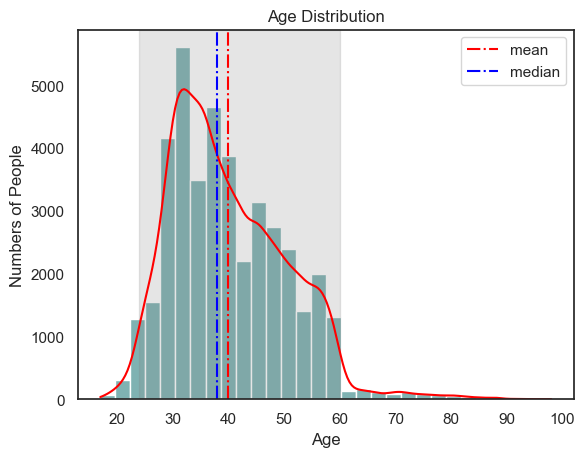

In [13]:
sns.set_theme(style="white")
ax = sns.histplot(x=df['age'], bins=30, kde=True, color= '#006666', alpha = 0.5)
# set the kde line to red color
ax.lines[0].set_color('red') 

# get lower and upper 95% interval bounds
lower, upper = np.percentile(df['age'], [2.5, 97.5])
plt.axvspan(lower, upper, color='grey', alpha=0.2)

# draw the mean and median lines
plt.axvline(df['age'].mean(), label = 'mean', linestyle = '-.', color = 'red')
plt.axvline(df['age'].median(), label = 'median', linestyle = '-.', color = 'blue')
plt.xlabel('Age')
plt.ylabel('Numbers of People')
plt.title('Age Distribution')

plt.legend()
plt.show()


Text(0.5, 0, 'Age')

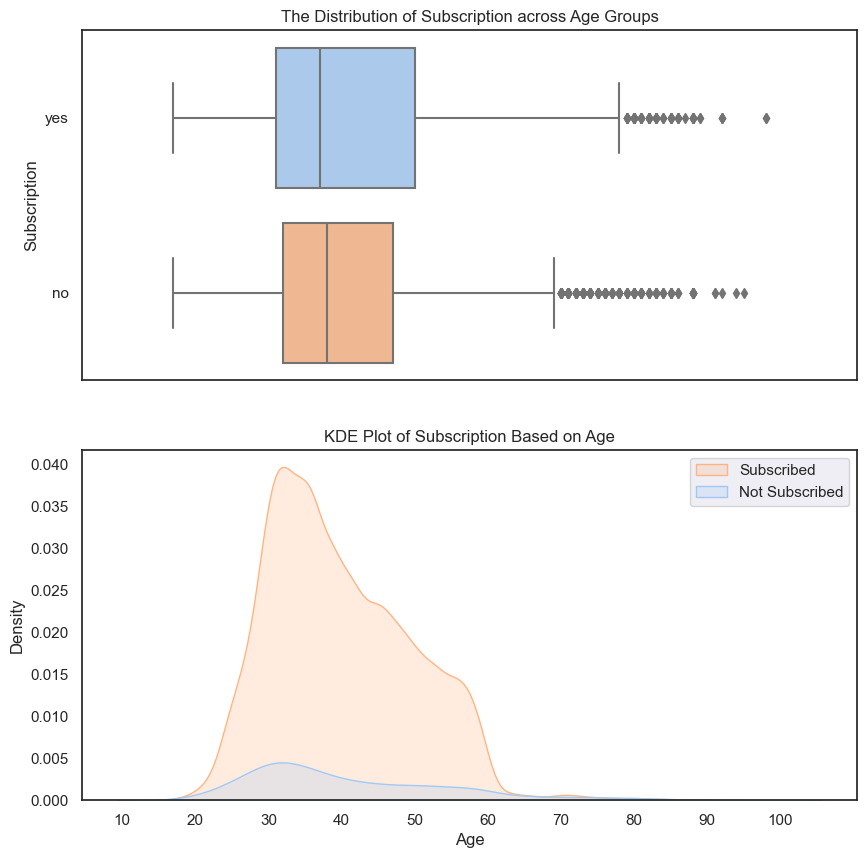

In [14]:
# create 2x1 subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# create the boxplot to see the distribution of 'yes' and 'no' across the age
sns.set_theme(style="darkgrid", palette="pastel")
sns.boxplot(data=df, x="age", y="y", order=["yes", "no"],ax = axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('Subscription')
axes[0].set_title('The Distribution of Subscription across Age Groups')

# create the kdeplot to observe the density of each response
sns.kdeplot(data=df, x="age", hue='y',hue_order=["yes","no"], ax = axes[1],fill = True)
axes[1].legend(['Subscribed', 'Not Subscribed'])
axes[1].set_title('KDE Plot of Subscription Based on Age')

# Set custom x-axis tick positions and labels
custom_ticks = np.arange(10, 110, 10)  # Custom tick positions
custom_labels = ['10', '20', '30', '40', '50', '60', '70', '80', '90', '100']  # Corresponding labels
plt.xticks(custom_ticks, custom_labels)
plt.xlabel('Age')


#### <a id='toc2_2_1_1_'></a>[Subscription and Contact Rate by Age ](#toc0_)
Examining the age group distribution of bank contact recipients and the proportion of 'yes' subscriptions within each age group to determine if the contacted customers' age demographics accurately match the subscribed population.

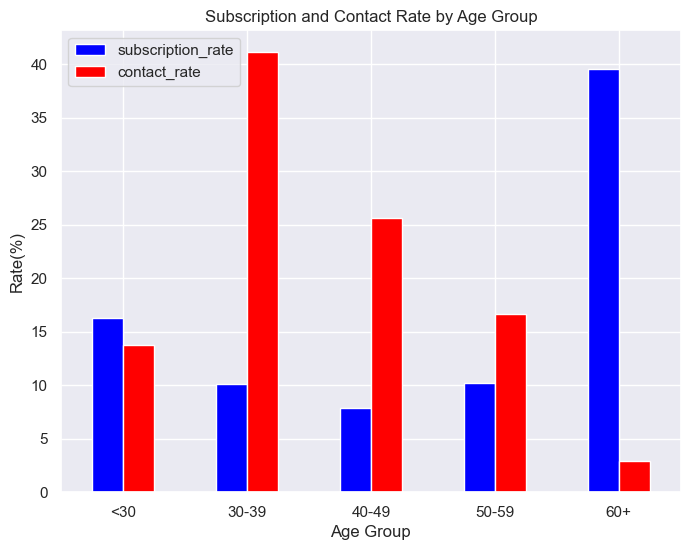

In [15]:
age_bins = [0, 30, 40, 50, 60, float('inf')]
age_labels = ['<30', '30-39', '40-49', '50-59', '60+']
df_group = df.copy()
df_group['age_group'] = pd.cut(df_group['age'], bins=age_bins, labels=age_labels, right=False)
# print(df_group['age_group'])
# Group by age group and calculate rates
# subscription_rate: y columns中訂閱產品的人，分布在各個年齡層的比率；contact_rate: 所有聯繫到的samples(41108)中，年齡分布的比例
age_rates = df_group.groupby('age_group').agg(subscription_rate=('y', lambda x: (x == 'yes').mean()*100),
                                              contact_rate=('age_group', lambda x: x.count() / df_group['age_group'].count() * 100)).reset_index()

# print(age_rates)

plot_age = age_rates[['subscription_rate','contact_rate']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('blue','red'))

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Rate(%)')
plt.title('Subscription and Contact Rate by Age Group')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.legend()

### <a id='toc2_2_2_'></a>[Variable : Job](#toc0_)
(1) In this dataset, the top three occupations among customers are managerial, blue-collar, and technician roles, and the success rate of telemarketing when targeting them is not significantly higher.

(2)The top two demographics with the highest proportion of bank term deposit product subscriptions are students and retirees.

In [16]:
count_y = df.groupby('job')['y'].value_counts().unstack()
sorted_count_y = count_y.sort_values(by='no', ascending=True)

sum_yes_no = sorted_count_y['no'] + sorted_count_y['yes']
sorted_count_y['percent_no'] = round(sorted_count_y['no'] / sum_yes_no,4)*100
sorted_count_y['percent_yes'] = round(sorted_count_y['yes'] / sum_yes_no,4)*100

print(sorted_count_y)

y                no   yes  percent_no  percent_yes
job                                               
other           287    34       89.41        10.59
student         599   275       68.54        31.46
unemployed      865   144       85.73        14.27
housemaid       951   106       89.97        10.03
self-employed  1267   149       89.48        10.52
retired        1282   433       74.75        25.25
entrepreneur   1330   123       91.53         8.47
management     2593   328       88.77        11.23
services       3640   323       91.85         8.15
technician     6003   728       89.18        10.82
blue-collar    8605   635       93.13         6.87
admin.         9058  1350       87.03        12.97


C:\Users\nmqsc\AppData\Local\Temp\ipykernel_1464\4036475683.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sorted_count_y.index)


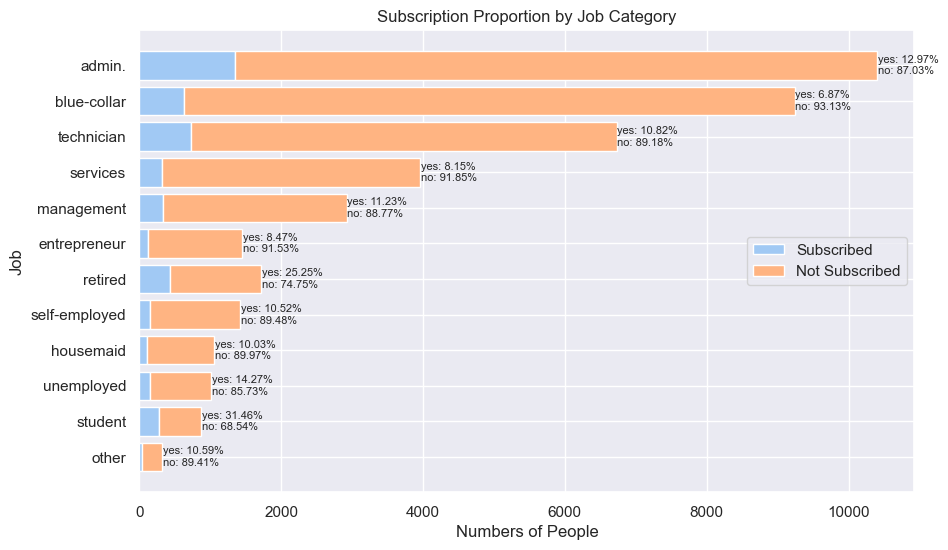

In [17]:
# draw the barh plot in stacked form by setting the 'left' parameter to sorted_count_y['yes']
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(sorted_count_y.index, sorted_count_y['yes'],  label = 'yes')
ax.barh(sorted_count_y.index, sorted_count_y['no'], left = sorted_count_y['yes'], label = 'no')

# set the y-axis and labels of the axes
ax.set_yticklabels(sorted_count_y.index)
ax.set_xlabel('Count')
ax.set_ylabel('Job')

for i, (yes_count, no_count, percent_no, percent_yes) in enumerate(zip(sorted_count_y['yes'], sorted_count_y['no'], sorted_count_y['percent_no'], sorted_count_y['percent_yes'])):
    ax.text(yes_count + no_count + 10, i, f'yes: {percent_yes:.2f}%\nno: {percent_no:.2f}%', va='center', fontsize=8)

plt.xlabel('Numbers of People')
plt.title('Subscription Proportion by Job Category')
plt.legend(['Subscribed', 'Not Subscribed'], loc = 'center right')


### <a id='toc2_2_3_'></a>[Variable : Marital](#toc0_)
Married customers make up the majority, and the proportion of subscriptions to telemarketing products is similar among the divorced group. The subscription rate is slightly higher among single individuals, but it is not significantly distinct.

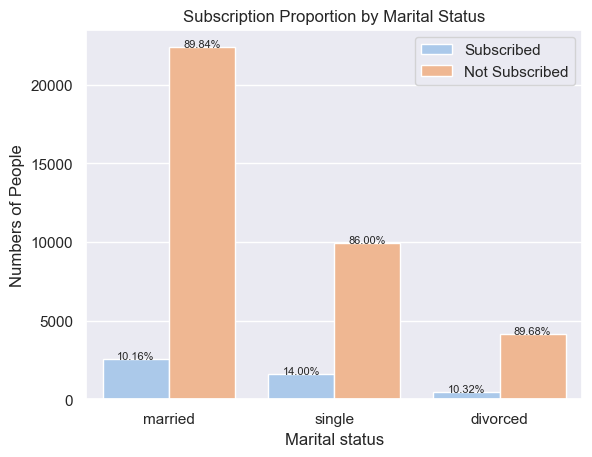

In [18]:
marital_y = df.groupby('marital')['y'].value_counts().unstack()
sorted_m_y = marital_y.sort_values(by='no', ascending = False)

mari_yes_no = sorted_m_y['no'] + sorted_m_y['yes']
sorted_m_y['percent_no'] = round(sorted_m_y['no'] / mari_yes_no,4)*100
sorted_m_y['percent_yes'] = round(sorted_m_y['yes'] / mari_yes_no,4)*100

# print(sorted_m_y)

fig, ax = plt.subplots()
sns.countplot(x = 'marital', data = df, hue = 'y', hue_order=['yes','no'])

for i, (yes_count, no_count, percent_no, percent_yes) in enumerate(zip(sorted_m_y['yes'], sorted_m_y['no'], sorted_m_y['percent_no'], sorted_m_y['percent_yes'])):
    ax.text(i - 0.2, yes_count, f'{percent_yes:.2f}%',  ha='center',fontsize=8)
    ax.text(i + 0.2, no_count, f'{percent_no:.2f}%', ha='center', fontsize=8)

plt.xlabel('Marital status')
plt.ylabel('Numbers of People')
plt.title('Subscription Proportion by Marital Status')
plt.legend(['Subscribed', 'Not Subscribed'])


### <a id='toc2_2_4_'></a>[Variable : Education](#toc0_)


In [19]:
count_y = df.groupby('education')['y'].value_counts().unstack()
sorted_edu_y = count_y.sort_values(by='yes', ascending=False)

edu_yes_no = sorted_edu_y['no'] + sorted_edu_y['yes']
sorted_edu_y['proportion_no(%)'] = round(sorted_edu_y['no'] / edu_yes_no,4)*100
sorted_edu_y['proportion_yes(%)'] = round(sorted_edu_y['yes'] / edu_yes_no,4)*100

print(sorted_edu_y)


# 取log ? 正規化? 標準化 ?

y                       no   yes  proportion_no(%)  proportion_yes(%)
education                                                            
university.degree    10473  1664             86.29              13.71
high.school           8471  1030             89.16              10.84
professional.course   4642   595             88.64              11.36
basic.9y              5566   471             92.20               7.80
basic.4y              3743   427             89.76              10.24
other                 1473   249             85.54              14.46
basic.6y              2098   188             91.78               8.22
illiterate              14     4             77.78              22.22


### <a id='toc2_2_5_'></a>[Variables : Housing, Personal Loan](#toc0_)

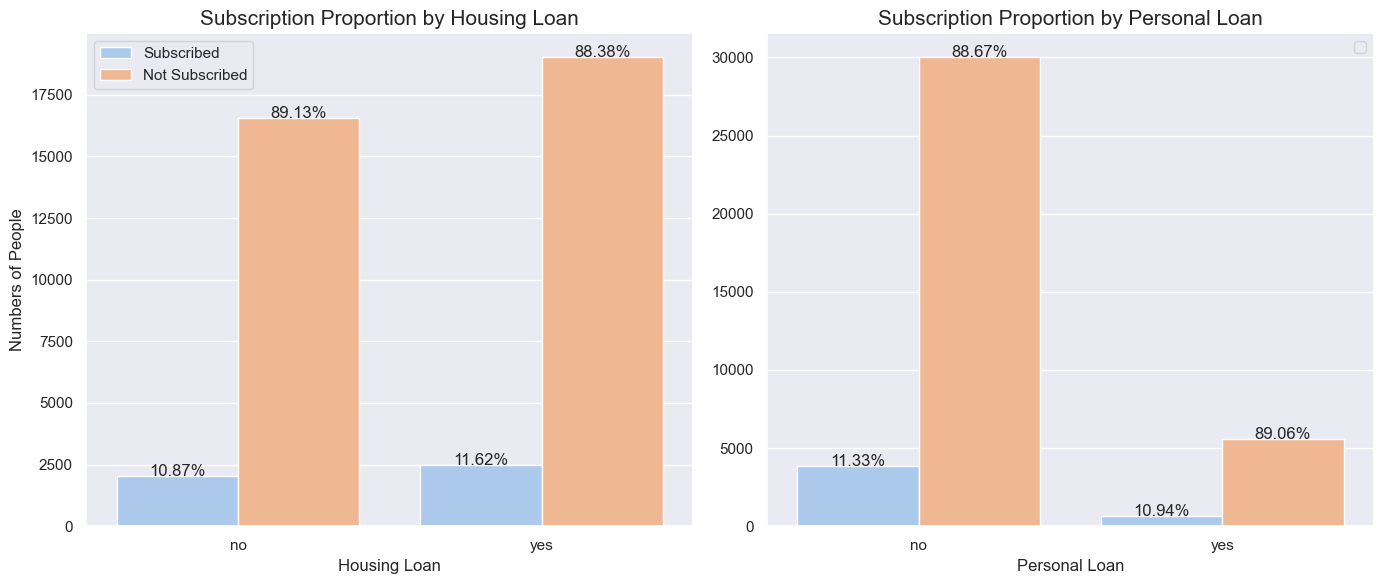

In [20]:
# Only observe the loan without unknown values
df1 = df.drop(df[df['housing'] == 'unknown'].index, axis = 0)
housing_y = df1.groupby('housing')['y'].value_counts().unstack()
sorted_h_y = housing_y.sort_values(by='yes', ascending = True)

hous_yes_no = sorted_h_y['no'] + sorted_h_y['yes']
sorted_h_y['percent_no'] = round(sorted_h_y['no'] / hous_yes_no,4)*100
sorted_h_y['percent_yes'] = round(sorted_h_y['yes'] / hous_yes_no,4)*100

# print(sorted_h_y)

df2 = df.drop(df[df['loan'] == 'unknown'].index, axis = 0)
loan_y = df2.groupby('loan')['y'].value_counts().unstack()
sorted_l_y = loan_y.sort_values(by='yes', ascending = False)

loan_yes_no = sorted_l_y['no'] + sorted_l_y['yes']
sorted_l_y['percent_no'] = round(sorted_l_y['no'] / loan_yes_no,4)*100
sorted_l_y['percent_yes'] = round(sorted_l_y['yes'] / loan_yes_no,4)*100

# print(sorted_l_y)

# set the fig and axes
fig, axes = plt.subplots(1,2, figsize=(14, 6))

# the first plot
sns.countplot(x = 'housing', data = df1, hue = 'y', hue_order=['yes','no'], ax=axes[0])

for i, (yes_count, no_count, percent_no, percent_yes) in enumerate(zip(sorted_h_y['yes'], sorted_h_y['no'], sorted_h_y['percent_no'], sorted_h_y['percent_yes'])):
    axes[0].text(i - 0.2, yes_count, f'{percent_yes:.2f}%',  ha='center',fontsize=12)
    axes[0].text(i + 0.2, no_count, f'{percent_no:.2f}%', ha='center', fontsize=12)

axes[0].set_xlabel('Housing Loan')
axes[0].set_ylabel('Numbers of People')
axes[0].set_title('Subscription Proportion by Housing Loan', fontsize=15)
axes[0].legend(['Subscribed', 'Not Subscribed'])

# the seconed plot
sns.countplot(x = 'loan', data = df2, hue = 'y', hue_order=['yes','no'], ax=axes[1])

for i, (yes_count, no_count, percent_no, percent_yes) in enumerate(zip(sorted_l_y['yes'], sorted_l_y['no'], sorted_l_y['percent_no'], sorted_l_y['percent_yes'])):
    axes[1].text(i - 0.2, yes_count, f'{percent_yes:.2f}%',  ha='center',fontsize=12)
    axes[1].text(i + 0.2, no_count, f'{percent_no:.2f}%', ha='center', fontsize=12)

axes[1].set_xlabel('Personal Loan')
axes[1].set_ylabel('')
axes[1].set_title('Subscription Proportion by Personal Loan', fontsize=15)
axes[1].legend([])


plt.tight_layout()


# <a id='toc3_'></a>[Creating Models (ML)](#toc0_)

## <a id='toc3_1_'></a>[Creating and Transforming Data](#toc0_)


### <a id='toc3_1_1_'></a>[Correlation between Variables](#toc0_)

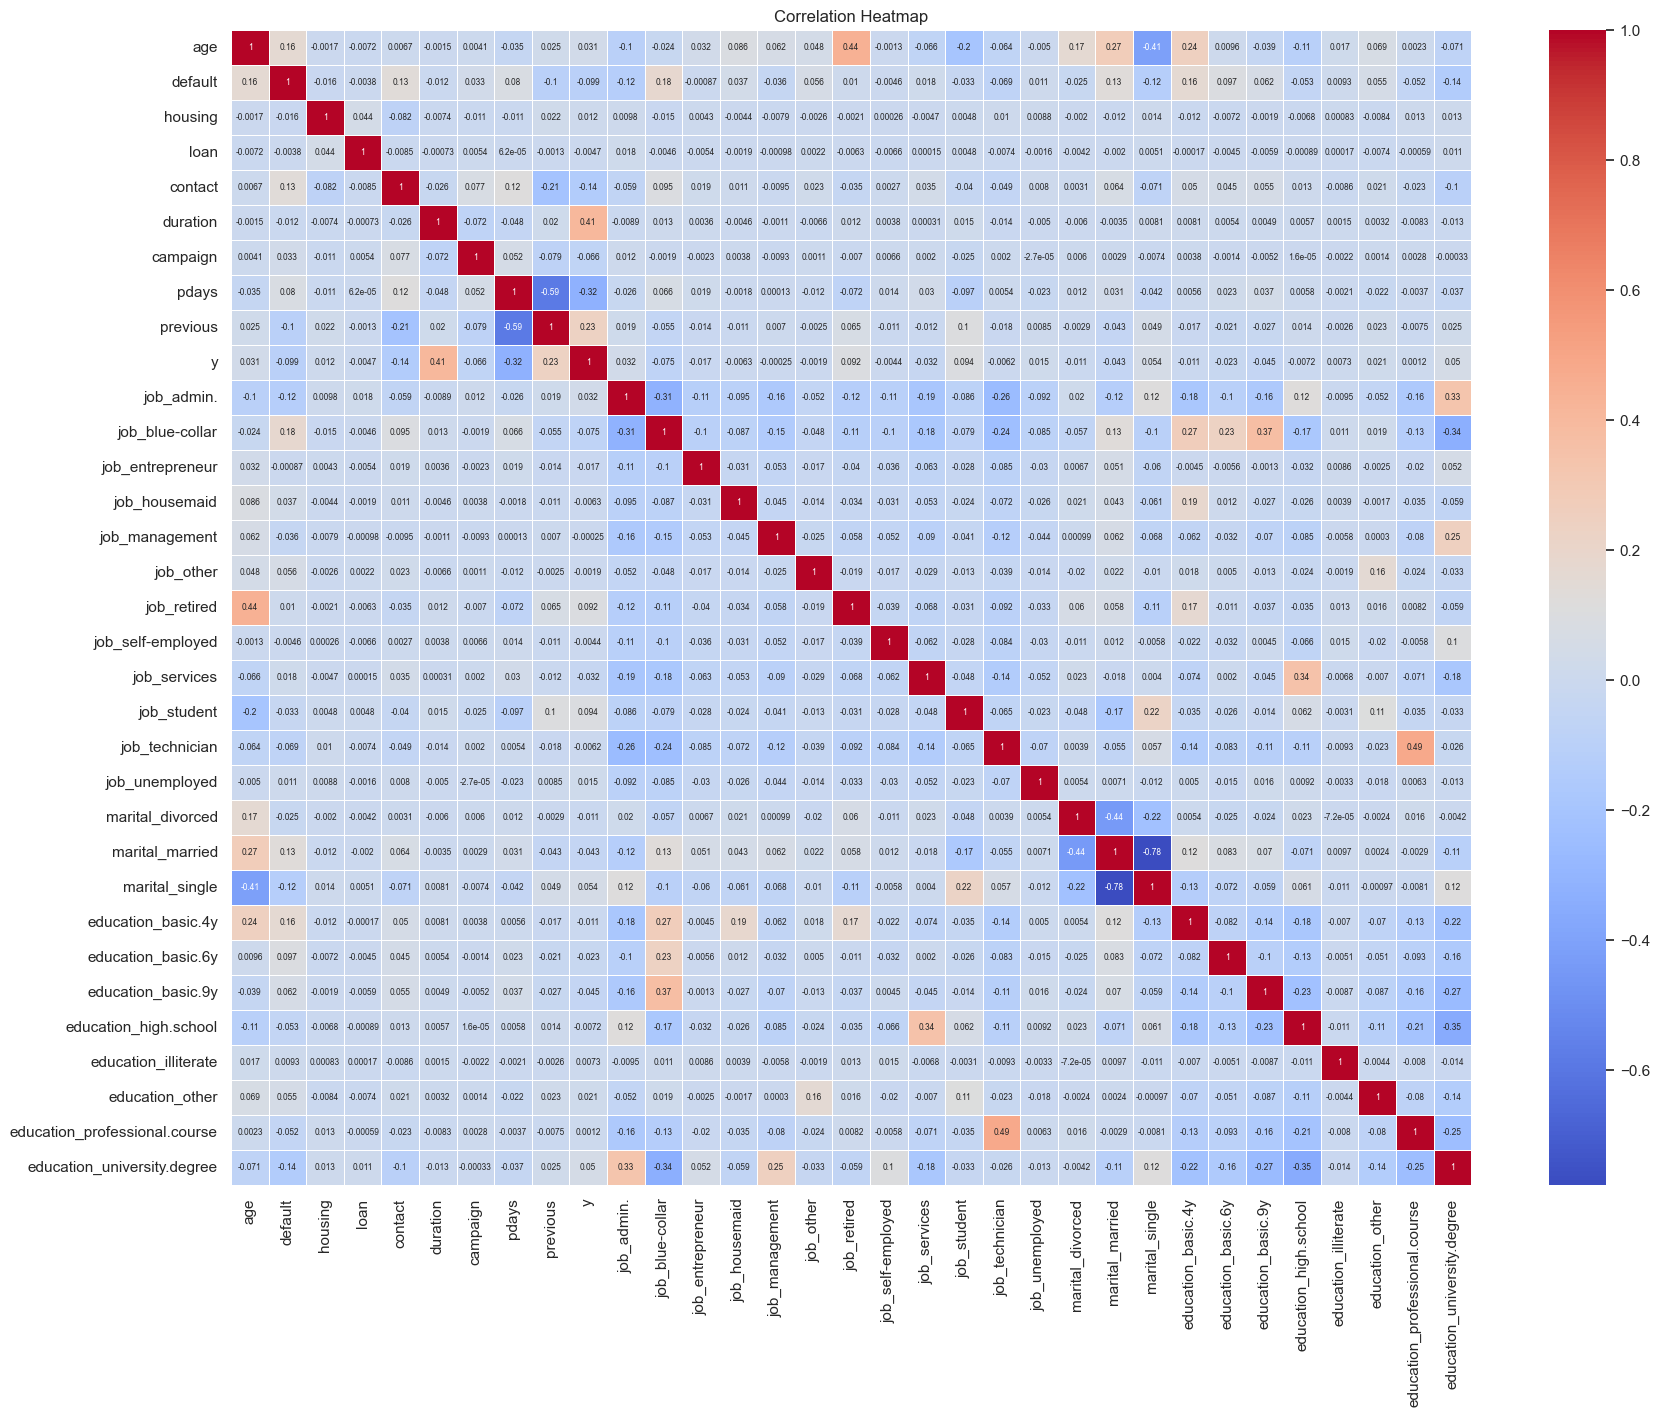

In [21]:
# transform some categorical variables into numeric variables
df2 = df.copy()
# label encoding for default, housing, loan, contact, y
label_encoder = LabelEncoder()
label_columns = ['default', 'housing', 'loan', 'y','contact']
for column in label_columns:
    df2[column] = label_encoder.fit_transform(df2[column])

# one hot encoding : job, marital, education
one_hot_columns = ['job', 'marital', 'education']
df2 = pd.get_dummies(df2, columns = one_hot_columns)

# Calculate correlation matrix
columns_to_drop = ['month', 'day_of_week', 'poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
df3 = df2.drop(columns=columns_to_drop)

correlation_matrix = df3.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, annot_kws={'size': 6}, cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()


Multicollinearity issues do not affect the accuracy of the model but do impact the explanatory power of independent variables (X) on the dependent variable (y). This dataset contains both categorical and numeric values, so after converting categorical values into dummy variables, the VIF (Variance Inflation Factor) within each category group can be quite high. The solutions are :
(1)When a dummy variable that represents more than two categories has a high VIF, multicollinearity does not necessarily exist. The variables will always have high VIFs if there is a small portion of cases in the category, regardless of whether the categorical variables are correlated to other variables.
(2)PCA reduces dimensionality by emphasizing the variance in the principal components and reducing the number of features, but it comes with limitations.


*One of the common ways to check for multicollinearity is the Variance Inflation Factor (VIF):

VIF=1, Very Less Multicollinearity

VIF<5, Moderate Multicollinearity

VIF>5, Extreme Multicollinearity (This is what we have to avoid)

Additional Note: https://corporatefinanceinstitute.com/resources/data-science/variance-inflation-factor-vif/

There are situations where high VFIs can be safely ignored without suffering from multicollinearity. The following are three such situations:

1. High VIFs only exist in control variables but not in variables of interest. In this case, the variables of interest are not collinear to each other or the control variables. The regression coefficients are not impacted.

2. When high VIFs are caused as a result of the inclusion of the products or powers of other variables, multicollinearity does not cause negative impacts. For example, a regression model includes both x and x2 as its independent variables.

3. When a dummy variable that represents more than two categories has a high VIF, multicollinearity does not necessarily exist. The variables will always have high VIFs if there is a small portion of cases in the category, regardless of whether the categorical variables are correlated to other variables.

In [22]:
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = df3.columns
    for i in range(0, x_var_names.shape[0]):
        y = df3[x_var_names[i]]
        x = df3[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

X = df3.drop(['y'],axis=1)
calculate_vif(X)

C:\Users\nmqsc\AppData\Local\Temp\ipykernel_1464\4270494743.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  vif = round(1/(1-r_squared),2)
C:\Users\nmqsc\AppData\Local\Temp\ipykernel_1464\4270494743.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  vif = round(1/(1-r_squared),2)
C:\Users\nmqsc\AppData\Local\Temp\ipykernel_1464\4270494743.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  vif = round(1/(1-r_squared),2)
C:\Users\nmqsc\AppData\Local\Temp\ipykernel_1464\4270494743.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  vif = round(1/(1-r_squared),2)
C:\Users\nmqsc\AppData\Local\Temp\ipykernel_1464\4270494743.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  vif = round(1/(1-r_squared),2)
C:\Users\nmqsc\AppData\Local\Temp\ipykernel_1464\4270494743.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  vif = round(1/(1-r_squared),2)
C:\Users\nmqsc\AppData\Local\Temp\ipykernel_14

,Var,Vif
16,job_retired,inf
17,job_self-employed,inf
31,education_professional.course,inf
30,education_other,inf
29,education_illiterate,inf
28,education_high.school,inf
27,education_basic.9y,inf
26,education_basic.6y,inf
25,education_basic.4y,inf
24,marital_single,inf


## <a id='toc3_2_'></a>[Compare Classification Algorithms](#toc0_)

### <a id='toc3_2_1_'></a>[Train test split](#toc0_)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# prepare data for classification
df4 =df3.drop(['duration','pdays'],axis=1)

# split the datasets into training and test data
X = df4.drop('y', axis=1).values
y = df4['y'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 410,test_size = 0.25)

# standardization of the data
stdsr = StandardScaler()
stdsr.fit(X_train)
X_train = stdsr.transform(X_train)
X_test = stdsr.transform(X_test)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('GBC', GradientBoostingClassifier()))

In [25]:
results_c = []
names_c = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=410,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold, scoring='accuracy')
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.888262 (0.004748)
KNN: 0.878110 (0.005831)
DT: 0.828549 (0.005654)
NB: 0.835360 (0.005230)
GBC: 0.889040 (0.005237)


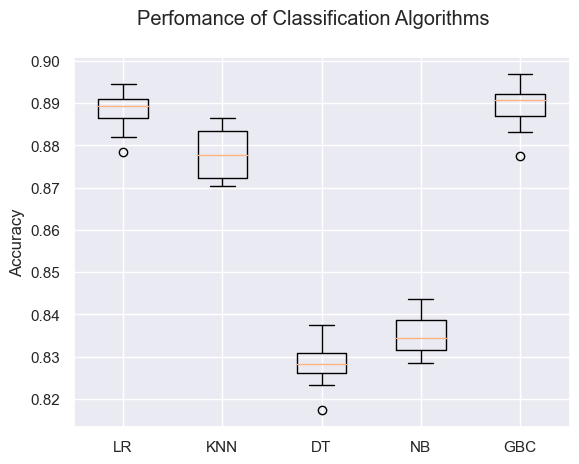

In [26]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.ylabel('Accuracy')
plt.show()

### <a id='toc3_2_2_'></a>[Test GBC Model on the Test Set](#toc0_)

In [27]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)

GradientBoostingClassifier()

In [28]:
predictions = GBC.predict(X_test)

In [29]:
# Accuracy Score 
print(accuracy_score(y_test, predictions))

0.891602607764912


[[9048   90]
 [1024  115]]


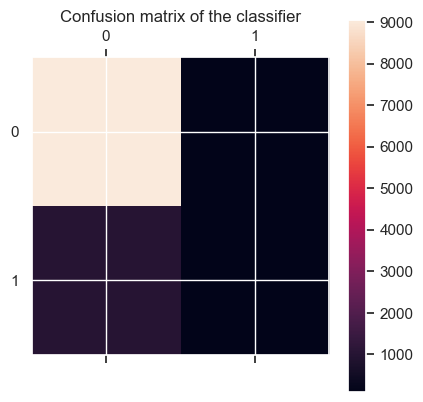

In [30]:
# Confusion Matrix 
print(confusion_matrix(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
plt.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.show()